<a href="https://colab.research.google.com/github/HyeonhoonLee/KIOM_KDC/blob/master/KDC_optimal_model_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#한글 폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [4]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##새로만든 csv에는 인코딩을 따로 지정하지 않아도된다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM_KDC/data/KDC_feature.csv")
df.shape

(500, 82)

In [5]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,...,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high,혈당_nan,총콜레스테롤_nan,중성지방_nan,고밀도콜레스테롤_nan,저밀도콜레스테롤_nan,혈당_log,중성지방_log
0,KDCT00001,2,0.036746,2,5,2,2,2,1,2,1,1,1.0,2.0,2,3,2,2,2,1,1,2.000000,2.0,1,3,3,1.0,1,2,2.490637,2.314607,1.0,1,2,2,2,2.0,2,12.0,2.0,...,1,3.0,5,0,2,0,0,0,1,0,2,-0.372588,-0.551481,-0.421862,-1.411128,-0.532671,0.266128,0.606435,89.0,-0.140773,0.167260,0.414628,0.017181,0.342702,0.220807,0.964152,-0.652711,0.941597,0.672927,1.542199,-0.376235,-1.040833,1.344987,0.219656,0.963293,-0.652738,0.937537,0.671852,4.653960,4.290459
1,KDCT00002,2,2.013834,14,3,2,1,1,1,1,1,1,1.0,2.0,1,3,1,1,1,1,3,2.000000,2.0,1,3,1,2.0,1,2,2.490637,2.314607,1.0,2,2,2,2,2.0,3,13.0,3.0,...,1,3.0,5,0,4,0,0,1,0,0,3,-0.748940,0.221659,0.869741,1.713833,0.077630,0.774588,1.211515,93.0,0.909300,0.814851,0.871402,0.267996,-1.005102,0.453146,0.376917,-0.343301,-0.196630,0.210896,1.542199,-0.376235,-1.040833,1.344987,0.451957,0.376095,-0.343379,-0.199521,0.209862,4.709530,4.584967
2,KDCT00003,1,0.119384,3,3,2,3,1,1,1,1,1,1.0,1.0,1,2,1,1,1,1,3,3.000000,2.0,3,2,3,1.0,1,2,2.490637,2.314607,1.0,3,2,3,2,2.0,2,12.0,2.0,...,1,3.0,7,0,2,0,0,1,0,0,2,-0.121687,-0.164911,-0.114338,0.672179,0.687931,0.647473,-0.119661,83.0,-0.350787,-1.127923,-1.869239,0.079885,-0.106566,-0.747269,0.876066,-0.454689,0.047276,0.804936,-0.648425,-0.376235,0.960769,-0.743502,-0.748265,0.875213,-0.454748,0.044134,0.803849,4.382027,4.488636
3,KDCT00004,2,0.152821,14,4,2,1,1,1,1,1,1,1.0,2.0,1,1,1,2,1,1,2,2.078385,1.0,3,2,2,3.0,2,2,2.490637,2.314607,1.0,2,2,2,2,1.0,2,15.0,3.0,...,1,4.0,7,0,4,0,0,1,0,0,2,0.505566,1.478013,1.392533,1.713833,0.687931,1.283048,1.574564,90.0,0.804292,0.555815,0.871402,-0.421745,0.432555,0.065915,0.934790,0.139377,-0.359233,0.936945,-0.648425,-0.376235,-1.040833,1.344987,0.064789,0.933933,0.139222,-0.361958,0.935846,4.615121,4.919981
4,KDCT00005,1,0.093090,8,2,2,3,2,3,2,2,3,2.0,2.0,2,3,3,2,2,2,1,2.000000,1.0,1,3,1,2.0,1,2,2.490637,2.314607,0.0,1,3,3,2,1.0,2,11.0,2.0,...,1,2.0,5,0,4,0,0,1,0,0,1,0.505566,0.898158,0.715979,2.234660,1.603383,2.045738,1.332531,99.0,1.539343,1.073888,1.023660,0.581515,-0.376127,-0.243870,-0.004785,-0.788851,-1.253554,0.342905,1.542199,-0.376235,-1.040833,1.344987,-0.244946,-0.005584,-0.788856,-1.255361,0.341859,4.532599,4.127134


# 학습과 예측에 사용할 데이터셋 만들기

In [6]:
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤', '수면시간(시간)_부족', '늑골둘레_low', '늑골둘레_middle',
       '늑골둘레_high', '혈당_nan', '총콜레스테롤_nan', '중성지방_nan', '고밀도콜레스테롤_nan',
       '저밀도콜레스테롤_nan', '혈당_log', '중성지방_log'],
      dtype='object')

In [7]:
# 이 중 feature engineeringd에서 score가 괜찮았던 것만 고른다.
# 즉, train에 사용할 column명만 가져온다.
X = df[['성별', '만나이', '직업분류', '학력', '결혼유무', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '피로정도', '피로_기상시', 
       '피로_오전', '피로_오후', '피로_밤', '피로_하루종일','키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', 
       '가슴둘레','허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '수면시간(시간)_부족', '늑골둘레_low', 
       '늑골둘레_middle', '늑골둘레_high', '총콜레스테롤_nan', '중성지방_nan', '고밀도콜레스테롤_nan',
       '저밀도콜레스테롤_nan', '혈당_log', '중성지방_log']]
X.shape

(500, 71)

In [8]:
y = df['한의사체질진단']
y.shape

(500,)

In [9]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((400, 71), (400,))

In [11]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((100, 71), (100,))

# 머신러닝 알고리즘 사용하기

In [57]:
# DecisionTree 를 불러옵니다.
# gini 계수가 0이면 tree 그리기를 멈춥니다.
# max_depth: 트리의 깊이 / min_samples_leaf: 마지막 노드의 최소 sample 수
# min_samples_split: sample 나누는 최솟값

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## 최적의 max_depth 값 찾기

In [45]:
# depth가 너무 길어서 끝단에 샘플 한두개로 분류를 한다면 overfitting되는 것이다.
# 반대로 depth가 너무 적으면 학습량이 적기 때문에 underfitting된다.
# depth갯수는 맨 처음 등장하는 Root을 제외한 node 갯수이다.
# 아래의 loop를 이용하여 최적의 max_depth를 찾는다.
from sklearn.metrics import accuracy_score

for max_depth in range(3, 14):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 52.0
4 46.0
5 45.0
6 44.0
7 46.0
8 43.0
9 44.0
10 43.0
11 42.0
12 49.0
13 49.0


## Grid Search

* https://scikit-learn.org/stable/modules/cross_validation.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

* param_grid에는 튜닝하고 싶은 파라미터 정보를 넣습니다.

* max_features는 일부 feature만 사용하고 싶을 때 사용합니다. 1은 전체라는 뜻입니다.

* n_jobs는 -1로 설정하여 사용 가능한 모든 장비를 학습에 이용합니다.

* cv는 cross validation을 5개로 나눕니다.

* verbose를 1로 하여 로그를 찍으면서 학습을 합니다. 0이면 로그를 출력하지 않습니다.

In [66]:
# 위와 같이 loop문이 아니라 sklearn에서 제공하는 최적의 파라미터를 찾는 방법을 사용해보자.
# estimator: 사용할 Model
# param_grid: 딕셔너리형태로 parameter 들을 입력./ max_features: 사용할 feature의 최대비율.
# n_jobs: 사용할 processer 장비의 갯수. -1은 모두 다 사용함을 의미.
# cv: 기본값 5. 5-fold cross validation
from sklearn.model_selection import GridSearchCV


model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 14), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)
#clf는 classification의 약자.

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 14),
                         'max_

In [67]:
# 최적의 parameter가 무엇인지.
clf.best_params_

{'max_depth': 9, 'max_features': 0.7}

In [68]:
# 위의 최적의 parameter로 만든 모델
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [69]:
clf.best_score_

0.5125

In [70]:
#clf.cv_results_ 는 cross vaildation의 결과를 반환해준다.
#clf.cv_results_는 딕셔녀리형태이므로 아래와 같이 df형태로 변환해준다.
#sort_values함수를 이용하여 "rank_test_score"를 기준으로 정렬해준다.
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()
#위의 best_score_ 값은 rank_test_score 1위 중에 cross-vaildation 결과인,
#split0~4_test_score 값의 평균이다.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.008678,0.000121,0.001416,0.000048,9,0.7,"{'max_depth': 9, 'max_features': 0.7}",0.5250,0.5750,0.5000,0.4125,0.5500,0.5125,0.055902,1
3,0.006844,0.001502,0.001415,0.000075,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.4875,0.4500,0.5125,0.5000,0.5250,0.4950,0.025739,2
52,0.009067,0.000350,0.001462,0.000054,13,0.7,"{'max_depth': 13, 'max_features': 0.7}",0.5375,0.5250,0.4625,0.4375,0.5125,0.4950,0.038406,3
47,0.009067,0.000533,0.001406,0.000031,12,0.7,"{'max_depth': 12, 'max_features': 0.7}",0.5375,0.5250,0.4375,0.4375,0.5125,0.4900,0.043589,4
12,0.008403,0.002834,0.001447,0.000071,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.5125,0.4625,0.5375,0.4125,0.5125,0.4875,0.044721,5


In [71]:
clf.predict(X_test)

array([2, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 3, 1,
       3, 2, 3, 1, 1, 1, 2, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1,
       3, 2, 3, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3, 2, 1, 3, 2, 1, 3,
       2, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 1, 3, 1,
       3, 3, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3])

In [72]:
clf.score(X_test, y_test)
# cross-validation 결과보다 낮게 나왔다.

0.46

## Random Search
<img src="https://i.imgur.com/N17CPGj.png">

출처 : http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

* Grid Search는 우리가 설정한 범위 안에서만 parameter을 탐색하지만
* Random Search는 좋은 성능을 낼 수 있는 랜덤값을 탐색합니다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [73]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [74]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([17, 16,  3, 18,  4,  5,  4,  6, 15,  5])

In [75]:
max_features = np.random.uniform(0.7, 1.0, 100)

In [76]:
param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([17, 16,  3, 18,  4,  5,  4,  6, 15,  5]),
 'max_features': array([0.83796439, 0.84624972, 0.77153891, 0.96951261, 0.74494889,
        0.89535017, 0.96405099, 0.82772766, 0.87009468, 0.95224693,
        0.86217363, 0.78061294, 0.97705221, 0.95268961, 0.93253121,
        0.98939425, 0.98905741, 0.72015021, 0.70682879, 0.84962389,
        0.90850163, 0.92333223, 0.95402581, 0.96679252, 0.76517115,
        0.75708662, 0.77678251, 0.77662281, 0.746831  , 0.82995054,
        0.76134005, 0.88080586, 0.75859066, 0.72170547, 0.97616797,
        0.9892056 , 0.7427925 , 0.79683276, 0.91949351, 0.79348335,
        0.80679497, 0.75882051, 0.86827486, 0.92195826, 0.75032839,
        0.98609348, 0.82829455, 0.82000656, 0.90126982, 0.89223554,
        0.78210818, 0.71750267, 0.87538232, 0.95807813, 0.95797012,
        0.90823426, 0.93727034, 0.97634401, 0.7463636 , 0.7955319 ,
        0.84677908, 0.89649234, 0.77897145, 0.85982332, 0.98517431,
        0.75407012, 0.95451722, 0.788

In [77]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [78]:
clf.best_params_

{'max_depth': 3, 'max_features': 0.8573144743915123, 'min_samples_split': 2}

In [79]:
clf.best_score_

0.5275

In [80]:
clf.score(X_test, y_test)

0.5

In [81]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
630,0.006068,0.000223,0.001434,0.000084,2,0.851263,3,"{'min_samples_split': 2, 'max_features': 0.851...",0.5125,0.5,0.5375,0.525,0.5625,0.5275,0.021506,1
956,0.005992,0.000163,0.001389,0.000115,6,0.852283,3,"{'min_samples_split': 6, 'max_features': 0.852...",0.5125,0.5,0.5375,0.525,0.5625,0.5275,0.021506,1
789,0.005976,0.000181,0.001737,0.000838,6,0.851263,3,"{'min_samples_split': 6, 'max_features': 0.851...",0.5125,0.5,0.5375,0.525,0.5625,0.5275,0.021506,1
718,0.005921,0.000267,0.001460,0.000123,3,0.857314,3,"{'min_samples_split': 3, 'max_features': 0.857...",0.5125,0.5,0.5375,0.525,0.5625,0.5275,0.021506,1
195,0.007057,0.002109,0.002724,0.002643,3,0.849624,3,"{'min_samples_split': 3, 'max_features': 0.849...",0.5125,0.5,0.5375,0.525,0.5625,0.5275,0.021506,1


In [ ]:
# rank_test_score의 상위 결과를 바탕으로, max_depth, max_features등의 랜덤 값을 정하는 
# np.random함수의 범위(최솟값, 최댓값 등)을 조절(수정)하여 RandomizedSearchCV를 다시 돌려서
# 더 좋은 score가 나오는 parameter를 찾을 수 있다.

# 학습과 예측하기

In [58]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [59]:
feature_names = X_train.columns.tolist()

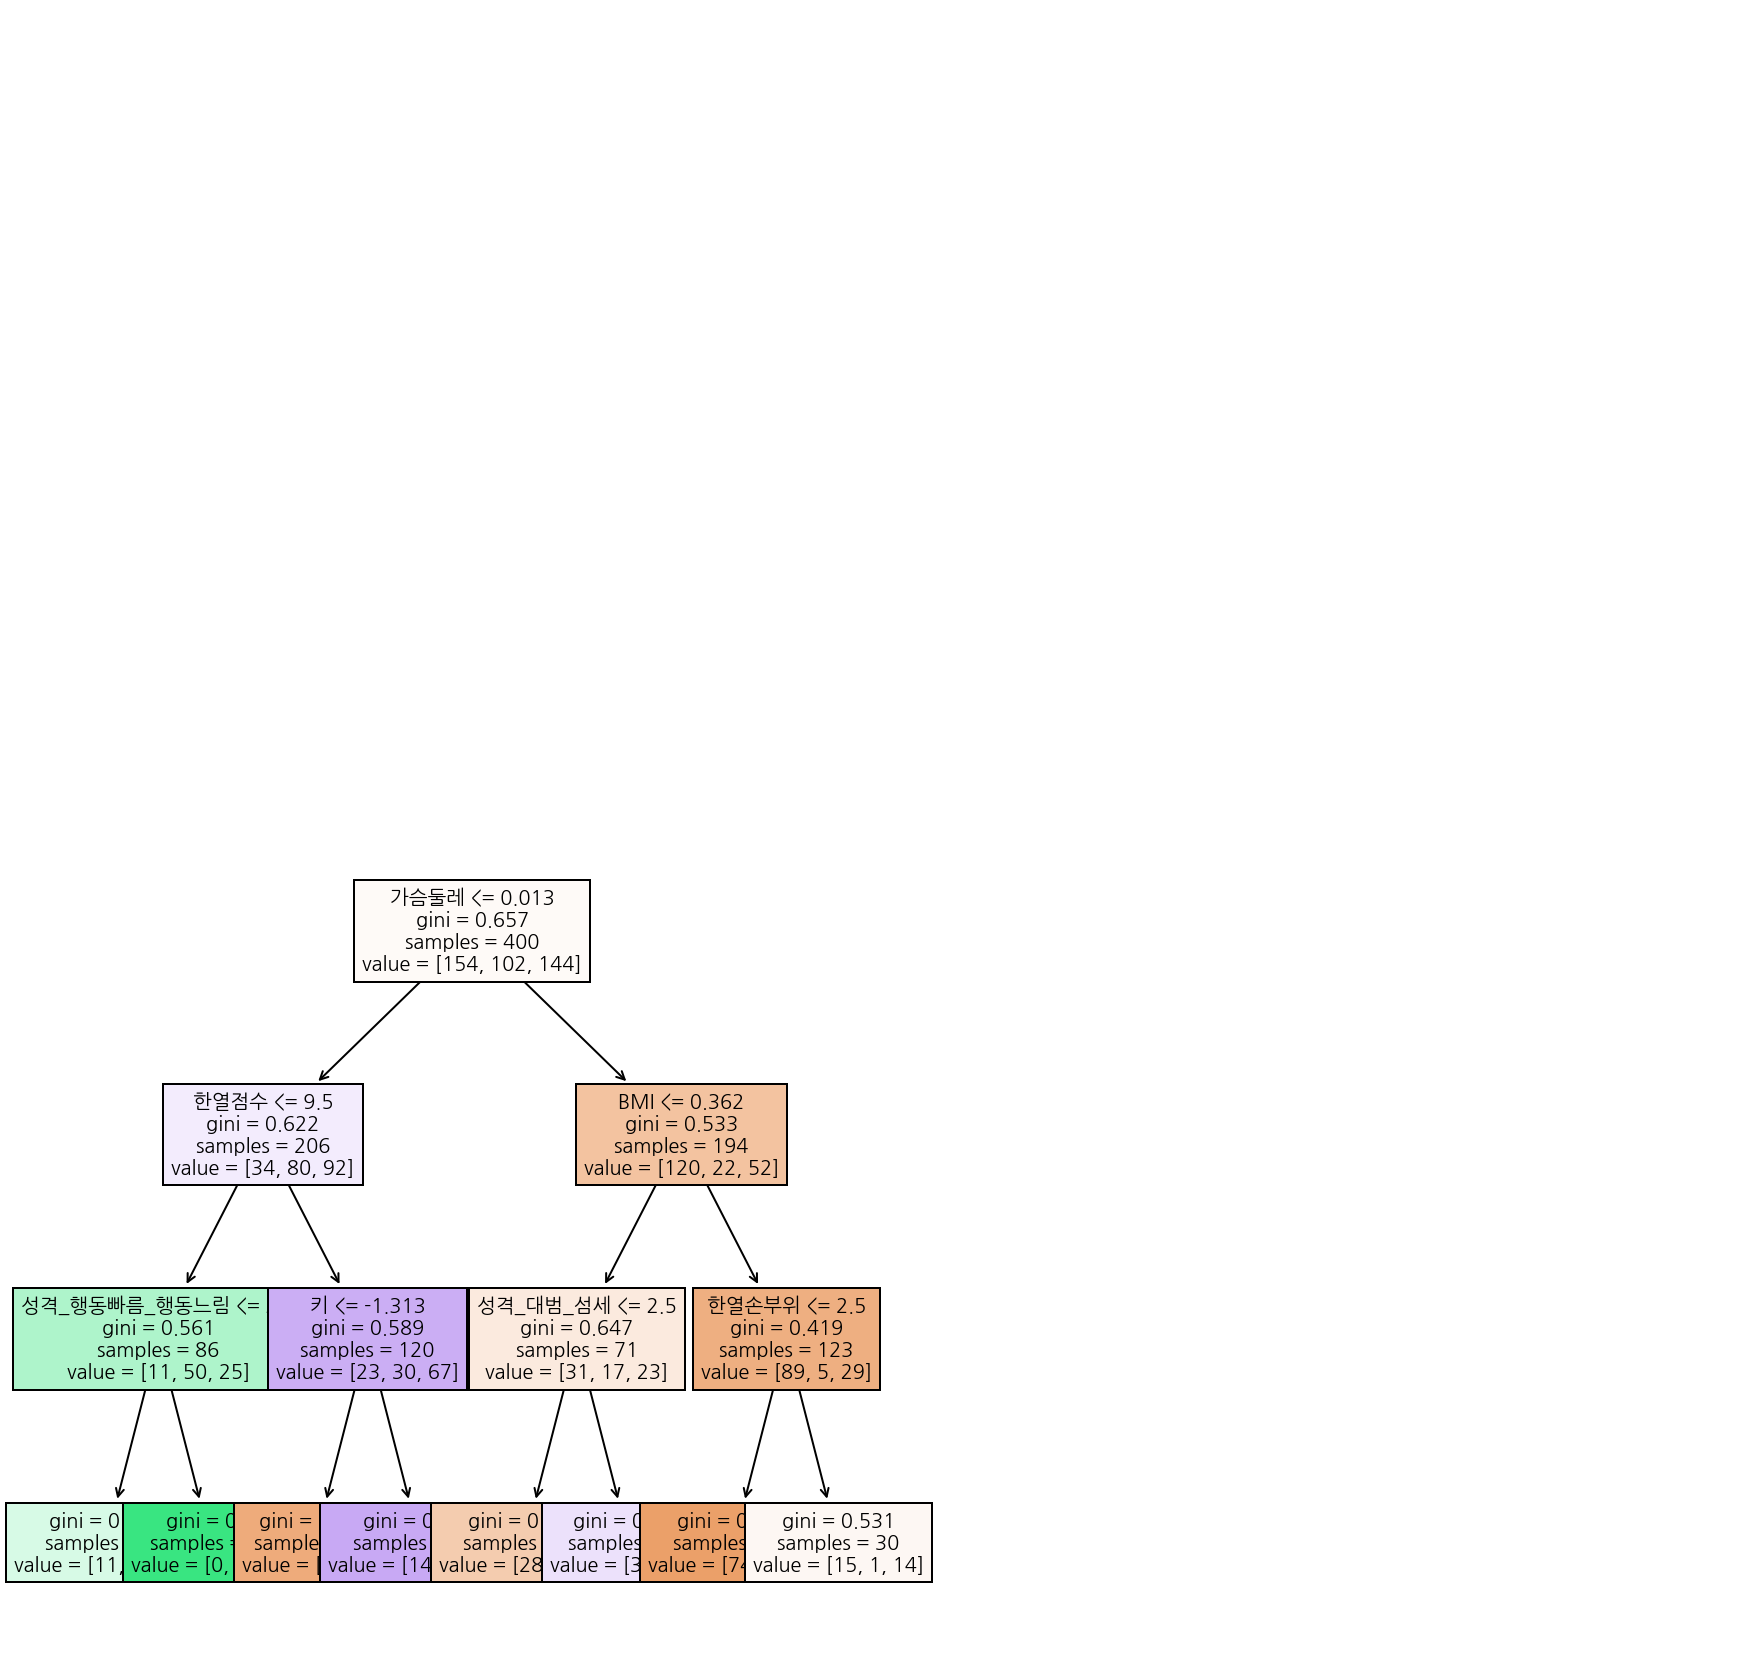

In [60]:
#feature _names: 어떤 항목에 대해서 나눴는지 node에 '표시'하기 위해 컬럼명을 입력해줘야한다.
#filled : 각 항목을 색깔로 구분하기 위해서 True로 입력.

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

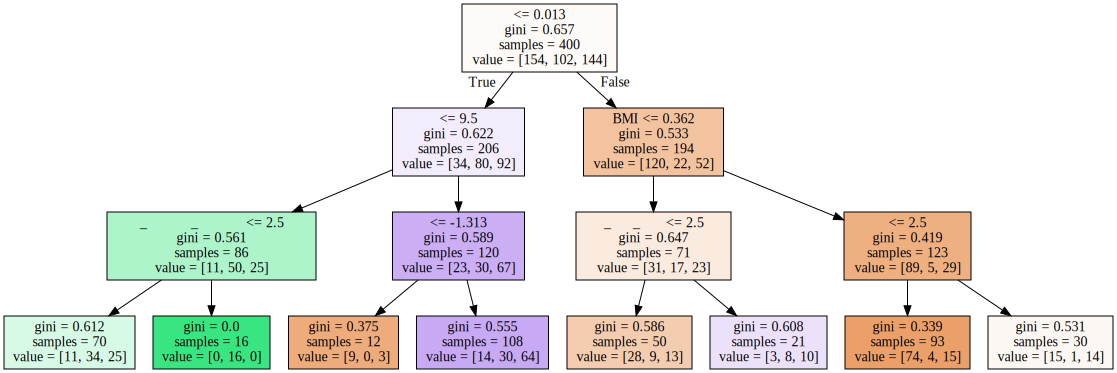

In [61]:
#graphviz 를 통해 시각화 합니다.
#graphviz 는 별도의 설치가 필요합니다. 
#graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [62]:
 # 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([3, 1, 2, 1, 1, 3, 2, 1, 1, 3, 3, 1, 1, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 2, 3, 1, 1, 1, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1,
       3, 3, 1, 2, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 3, 2, 3, 1, 3,
       3, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 2,
       1, 3, 1, 1, 2, 1, 1, 1, 3, 3, 3, 1])

# 정확도(Accuracy) 측정하기

In [63]:
# 예측의 정확도를 구해봅니다.
y_predict_list = y_predict.tolist()
y_test_list = y_test.tolist()
acc = 0
for i in range(len(y_predict_list)):
  if y_predict_list[i] == y_test_list[i]:
    acc += 1
print("정확도 : ", acc/len(y_predict_list))

정확도 :  0.52


In [64]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

52.0

In [65]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

52.0

In [ ]:
#1 from sklearn.model_selection import train_test_split 을 이용하여
#random하게 dataset 나누어 학습 및 예측: acc 49% => 이전에 순서대로 80% 나눈 dataset에 overfit되었음을 확인.
#2 loop문을 이용하여 최적의 max_depth 값 찾기: acc 52%
#3 GridSearchCV를 이용. model score도 Grid search를 이용해서 구함.(clf.score(X_test, y_test)): acc 46%
#4 RandomizedSearchCV를 이용: acc 50%